In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [5]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#AnonOccupy: Bio of a Villain,2015,USA,2015-11-05
2,#Beings,2015,Romania,2015-01-29
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Nerealnaya lyubov,2014,Russia,2014-02-13


In [19]:
months = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

In [22]:
# This column adds a month column to the release_dates data frame for easy access to month strings
release_dates['month'] = release_dates.date.dt.month

### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

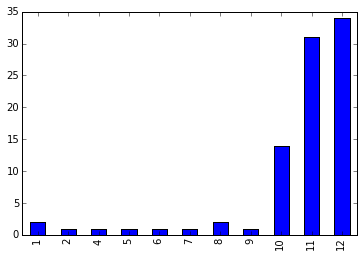

In [14]:
release_dates[release_dates.title.str.contains("Christmas") & (release_dates.country == "USA")].date.dt.month.value_counts().sort_index().plot(kind="bar")

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

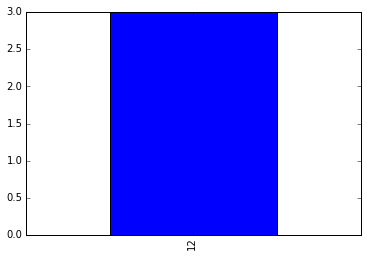

In [8]:
release_dates[release_dates.title.str.startswith("The Hobbit") & (release_dates.country == "USA")].date.dt.month.value_counts().plot(kind="bar")

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

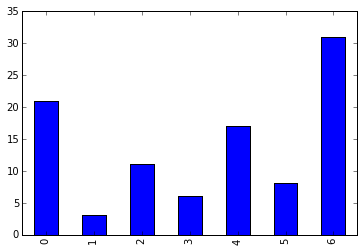

In [9]:
release_dates[release_dates.title.str.contains("Romance") & (release_dates.country == "USA")].date.dt.dayofweek.value_counts().sort_index().plot(kind="bar")

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

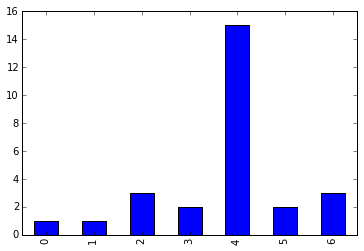

In [10]:
release_dates[release_dates.title.str.contains("Action") & (release_dates.country == "USA")].date.dt.dayofweek.value_counts().sort_index().plot(kind="bar")

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [11]:
j = cast[(cast.name == "Judi Dench") & (cast.year // 10 == 199)]
j.merge(release_dates[release_dates.country == "USA"], on=['title', 'year']).sort_index(by=['year']).filter(['title', 'date'])

,title,date
0,GoldenEye,1995-11-17
2,Jack & Sarah,1996-03-22
1,Hamlet,1996-12-25
3,Mrs Brown,1997-07-18
7,Tomorrow Never Dies,1997-12-19
4,Shakespeare in Love,1999-01-08
5,Tea with Mussolini,1999-05-14
6,The World Is Not Enough,1999-11-19


### In which months do films with Judi Dench tend to be released in the USA?

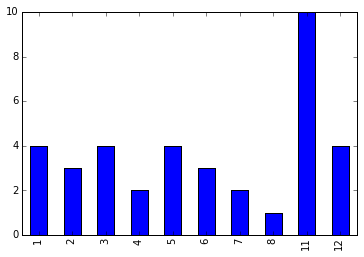

In [28]:
j = cast[cast.name == "Judi Dench"]
j.merge(release_dates[release_dates.country == "USA"], on=['title', 'year']).date.dt.month.value_counts().sort_index().plot(kind="bar")

### In which months do films with Tom Cruise tend to be released in the USA?

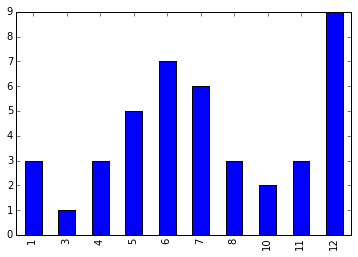

In [27]:
j = cast[cast.name == "Tom Cruise"]
j.merge(release_dates[release_dates.country == "USA"], on=['title', 'year']).date.dt.month.value_counts().sort_index().plot(kind="bar")